# Time series analysis

- Time series problem
- Explain dataset and vaiables
- Model 1: ARIMA model
- Model 2: SARIMA model
- Comparing the two models
- Conclusion

Time series refers to any data which is collected at regular intervals over time.

By fitting a model to time series data, we can create forecasts of future outcomes.

For the purpose of this project, we will be analsing the stock price of the S&P 500 of a period of time and hopefully forecasting the projected future prices within a reasonable confidence level. 

The aim of this project is to predict the price of the S$P 500.

The dataset obtained from the S&P 500 data contains the variables:
- 'Date' - Date of the S&P 500 prices 
- 'Open'- Opening Price of the S&P 500 on the respective date
- 'High' - Highest Price of the S&P 500 on the respective date
- 'Low' - Lowest Price of the S&P 500 on the respective date
- 'Close' - Price the S&P 500 finished on the respective date (in U.S. Dollers)

We will analysing two different models for tackling the problem and comparing the result from each.

### Using AIRMA

Aim of Project:
- Load the data
- Preprocessing
- Make series stationary
- Determine d value
- Create ACF and PACF plot
- Determine the p and q values
- Fit ARIMABmodel 
- Predict values on validation set
- Calculate RMSA

### Loading the dataset

The dataset contains


Variable

In [1]:
## Importing the pandas library which is useful for reading, 
## manipulating and analysising data
import pandas as pd

## Loads the 'SaP_500_3yrs_Monthly.csv' file as a DataFrame ('SP_500'), 
## which contains our dataset
SP_500 = pd.read_csv('SaP_500_3yrs_Monthly.csv')

# Shows us the first 5 Rows in the 'SP_500' Dataframe
SP_500.head()

,Date,Open,High,Low,Close
0,11/2021,4610.62,4663.46,4595.06,4660.57
1,10/2021,4317.16,4608.08,4278.94,4605.38
2,09/2021,4528.80,4545.85,4305.91,4307.54
3,08/2021,4406.86,4537.36,4367.73,4522.68
4,07/2021,4300.73,4429.97,4233.13,4395.26


In [2]:
## Remove all the columns in 'SP_500' DataFrame except 
## the 'Close' column  which is useful for plotting the data 
SP_500_Close = SP_500[['Close']].dropna()
print(SP_500_Close)

      Close
0   4660.57
1   4605.38
2   4307.54
3   4522.68
4   4395.26
5   4297.50
6   4204.11
7   4181.17
8   3972.89
9   3811.15
10  3714.24
11  3756.07
12  3621.63
13  3269.96
14  3363.00
15  3500.31
16  3271.12
17  3100.29
18  3044.31
19  2912.43
20  2584.59
21  2954.22
22  3225.52
23  3230.78
24  3140.98
25  3037.56
26  2976.74
27  2926.46
28  2980.38
29  2941.76
30  2752.06
31  2945.83
32  2834.40
33  2784.49
34  2704.10
35  2506.85
36  2760.17
37  2711.74
38  2913.98
39  2901.52
40  2816.29
41  2718.37
42  2705.27
43  2648.05
44  2640.87


## Visualising the dataset

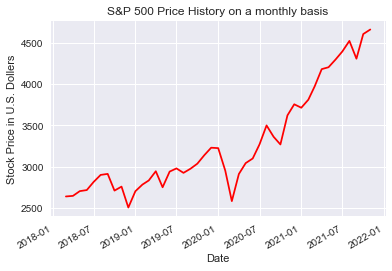

In [3]:
## Draw a plot of the S&P 50 data
from matplotlib import pyplot as plt

## Styling the plots for the project
plt.style.use(style="seaborn")
%matplotlib inline

## Creates a new Dataframe using only the 'Date' and 'Close' variables
## to plot the dataset only using the closing day  price of the S&P 
## Stock Price and the dates for these Closing day prices.
Plotting_SP_500 = pd.DataFrame(SP_500, columns = ['Date', 'Close'])

## Creates a Variable 'Plotting_SP_500_Profit' which contains all 
## the closing day prices in our dataset.  
## It is also necessary to reverse the order of the 
## 'Plotting_SP_500_Profit' variables content because our data set 
## starts with the newest content from the dataset whereas resonable 
## plots containing data need to be shown in the reverse order.
Plotting_SP_500_Profit = SP_500.iloc[:, -1].values
Plotting_SP_500_Profit = Plotting_SP_500_Profit[::-1]

## Creates a Variable 'Plotting_SP_500_Date' which contains all the 
## dates assosiated with the closing price in the 
## 'Plotting_SP_500_Profit' variable created above.
## This new variables content also need to be reversed 
## in order to align properly with the above variable.
Plotting_SP_500_Date = SP_500.iloc[:, 0].values
Plotting_SP_500_Date = Plotting_SP_500_Date[::-1]

## Converts the content in the 'Plotting_SP_500_Date' variable to 
## datetime. This is needed for the 'autofmt_xdate()' function 
## used to make the plot of the dataset more readable.
Plotting_SP_500_Date = pd.to_datetime(Plotting_SP_500_Date)

## Creates a new Dateframe to store only the content needed to 
## plot the dataset.
Plot_for_SP_500 = pd.DataFrame(Plotting_SP_500_Profit, Plotting_SP_500_Date)

## Using the 'matplotlib' libriary to plot the dataset 
plt.figure('S&P 500 Price History')
plt.title('S&P 500 Price History on a monthly basis')
plt.xlabel('Date')
plt.ylabel('Stock Price in U.S. Dollers')
plt.grid(True)
plt.plot(Plot_for_SP_500, color = 'red')
plt.gcf().autofmt_xdate()

plt.show()

## ARIMA Model 1: ARIMA model

The first model we are going to test for this problem 
is ARIMA

An ARIMA model is characterised by 3 terms(<i>p</i>, <i>d</i>, <i>q</i>):
- <i>p</i> is the oreder of the AR term
- <i>d</i> is the number of differencing required to make the time series stationary
- <i>q</i> is the order of the MA term

It is necessary for the time series to be stationary in order to fit the ARIMA model.

Price series are typically non-stationary because the time in which the data is collected has a tendency to affect how the prices can change over a period of time, such as the season of the year where the data has been collected.

### Making the time series stationary

It's firstly important to check if the time series is stationary. This can be done using the 'adfuller' function from the 'statsmodel' libriary which performs the Augmented Dickey-Fuller (ADF) test to show the presence of serial correlation in our time series.

So, in our case, if the p-value > 0.05 we'll need to find the order of differencing.

Before converting the time series to a stationary series we need to confirm that the time series is non-stationary by performing the ADF test on the Closing Price data. 

In [4]:
# Check if the price series is stationary

## Importing the 'adfuller' functionfrom the 'statesmodel' libriary
## to perform the Augmented Dickey-Fuller (ADF) to check if
## the time series stationary
from statsmodels.tsa.stattools import adfuller


## Creates a Variable 'SP_500_Close_Values' which contains all
## the content from the 'SP_500_Close' Variable.
## It is also necessary to reverse the order of the 
## 'SP_500_Close_Values' variables content because our data set 
## starts with the newest content from the dataset we need to 
## have the newest content at the end of the Dtaframe.
## We also need to reset the 'index' column or else our plots 
## will be in reverse
SP_500_Close_Values = SP_500_Close
Reverse_SP_500_Close_Values = SP_500_Close_Values[::-1]
Reverse_SP_500_Close_Values.reset_index(inplace=True, drop=True)

## Uses the 'adfuller' function to check if the time series
## is stationary or not
result = adfuller(Reverse_SP_500_Close_Values.dropna())

print("ADF Statistic:   ", result[0])
print("p-value:         ", result[1])

ADF Statistic:    0.3802555084426435
p-value:          0.9807413629845056


Our p-value is 0.98 so it clear that this price series is non-stationary. This isn't a problem since we could have probably guessed that the time in which the prices were collect will influence future results.

In order to make the ARIMA model work for this series we need to difference them.

Nee

We can you the ACF plot from stats.models and the acf plot tells us how many terms are required to remove any autocorrelation in the series

#### Autocorrelation Function (ACF)

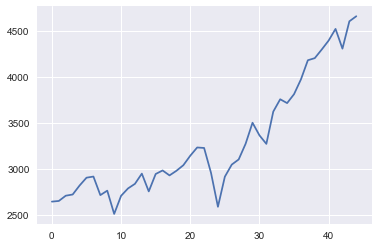

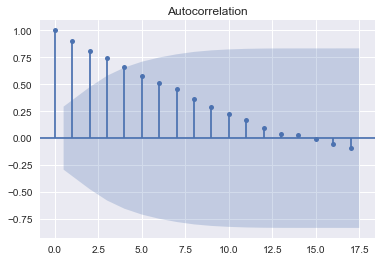

In [15]:
## Importing the 'plot_acf' function from the 'statsmodel' libriary
## to plot the autocorrelation for our time series data.
## This function plots the lags on the horizonal and 
## the correlations on the vertical axis
from statsmodels.graphics.tsaplots import plot_acf

## Plots the autocorrelation for the closing prices of the S&P 500 
## in our dataset
plt.plot(Reverse_SP_500_Close_Values)
plt.title('Original data')
plot_acf(Reverse_SP_500_Close_Values)
plt.show()

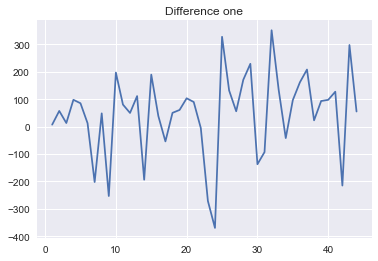

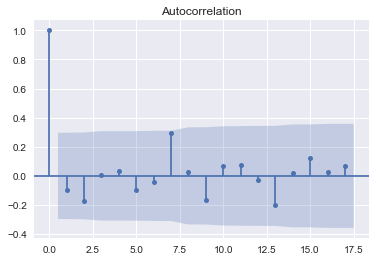

In [13]:
## Calculates the difference of the closing price data
diff = Reverse_SP_500_Close_Values.diff().dropna()

## Plots the autocorrelation of the difference for the closing prices 
## of the S&P 500 in our dataset
plt.plot(diff)
plt.title('Difference one')
plot_acf(diff)
plt.show()

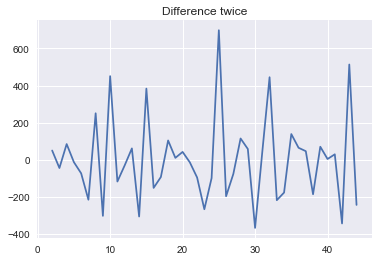

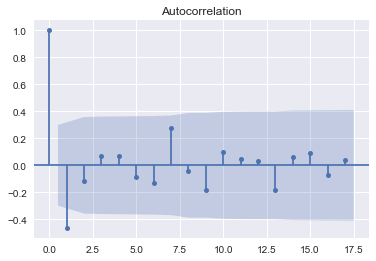

In [12]:
## Calculates the difference of the difference 
## the closing price data
diff = Reverse_SP_500_Close_Values.diff().diff().dropna()

plt.plot(diff)
plt.title("Difference twice")
## Add ; to the end of the plot function so that the plot is not 
## duplicated
plot_acf(diff);

Lag terms in graph skew to lag axis when the series is differeced twice the series is over differenced.

So d = 1

Double check below

In [17]:
## Estimates the ARIMA differencing term d required to make the time 
## series stationary
from pmdarima.arima.utils import ndiffs

print("Estimate ARIMA diferencing term, d, required to convert the time series to stationary below:")
ndiffs(Reverse_SP_500_Close_Values, test="adf")

Estimate ARIMA diferencing term, d, required to convert the time series to stationary below:


1

p

p is the order of the Auto Regressive (AR) term. It refers to the number of lags to be used as predictors.

We can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

The partial autocorrelation represents the correlation between the series and its lags.

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf

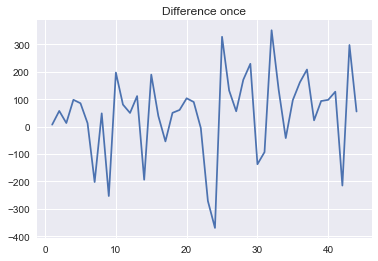

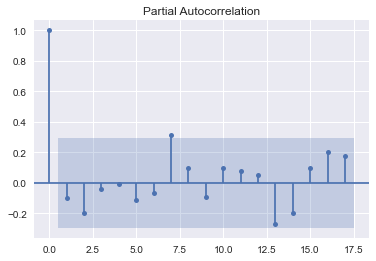

In [19]:
diff = Reverse_SP_500_Close_Values.diff().dropna()

plt.plot(diff)
plt.title('Difference once')
plot_pacf(diff)
plt.show()

The partial autocorrelation lag number 6 is above the significance line.

We make p = 6

We can observe that the PACF lag 6 is significant as it's above the significance line.

#### q

q is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

We can look at the ACF plot for the number of MA terms.

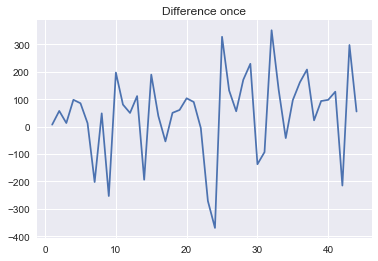

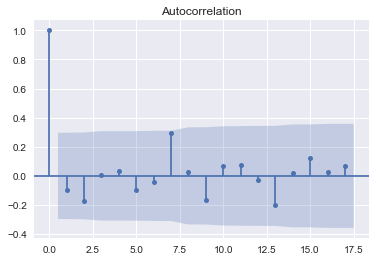

In [21]:
diff = Reverse_SP_500_Close_Values.diff().dropna()

plt.plot(diff)
plt.title("Difference once")
plot_acf(diff);

We choose a forcast of 3

### Fitting the ARIMA model

In [23]:
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings('ignore')     # Ignore unnecessary warnings

# ARIMA Model
#model = ARIMA(Reverse_SP_500_Close_Values, order=(6, 1, 1))
model = ARIMA(Reverse_SP_500_Close_Values, order=(6, 1, 1))
result = model.fit(disp=0)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                   44
Model:                 ARIMA(6, 1, 1)   Log Likelihood                -282.314
Method:                       css-mle   S.D. of innovations            147.528
Date:                Sat, 13 Nov 2021   AIC                            582.628
Time:                        12:17:30   BIC                            598.686
Sample:                             1   HQIC                           588.583
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            44.4670     14.461      3.075      0.002      16.123      72.811
ar.L1.D.Close    -0.6646      0.427     -1.556      0.120      -1.502       0.173
ar.L2.D.Close    -0.2644      0.185     -1.426      0.154      -0.628       0.099
ar.L3.D.Close    -0.1548      0.197     -0.784      0.433      -0.542       0.232
ar.L4.D.Close    -0.0677      0.181     -0.375      0.708      -0.421       0.286
ar.L5.D.Close    -0.1163      0.174     -0.668      0.504      -0.458       0.225
ar.L6.D.Close    -0.1805      0.151     -1.199      0.230      -0.476       0.115
ma.L1.D.Close     0.5489      0.417      1.316      0.188      -0.269       1.366
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1646           -0.4999j            1.2674           -0.4355
AR.2           -1.1646           +0.4999j            1.2674            0.4355
AR.3           -0.2393           -1.2819j            1.3041           -0.2794
AR.4           -0.2393           +1.2819j            1.3041            0.2794
AR.5            1.0817           -0.9261j            1.4240           -0.1127
AR.6            1.0817           +0.9261j            1.4240            0.1127
MA.1           -1.8218           +0.0000j            1.8218            0.5000
-----------------------------------------------------------------------------
"""

(array([0.00031946, 0.00031946, 0.00063893, 0.00063893, 0.00063893,
        0.00159732, 0.0044725 , 0.00287518, 0.00159732, 0.00095839]),
 array([-453.03263802, -381.89081614, -310.74899426, -239.60717238,
        -168.46535051,  -97.32352863,  -26.18170675,   44.96011513,
         116.10193701,  187.24375889,  258.38558077]),
 <BarContainer object of 10 artists>)

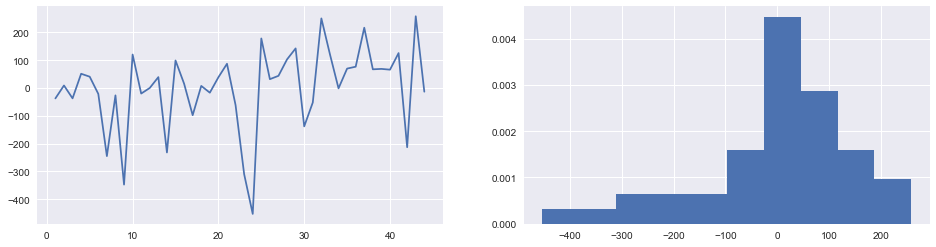

In [24]:
# Plot residual errors
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(residuals)
ax2.hist(residuals, density=True)

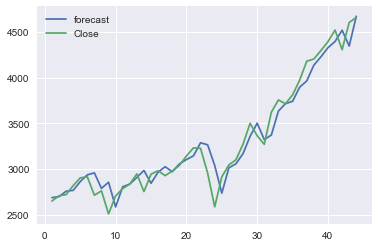

In [25]:
# Actual vs Fitted
result.plot_predict(
    start=1, end=44, dynamic=False,
)

plt.show()

print(result)

Train test split

In [26]:
## 'n' is an integer that is the equivalant to 87.5% of the
## amount of closing prices from our dataset
n = int(len(Reverse_SP_500_Close_Values) * 0.875)
## Our training set contains the first 87.5% of closing prices 
## from our dataset
train = Reverse_SP_500_Close_Values[:n]
## Our testing set will contain the remainder of closing prices 
## from our dataset
test = Reverse_SP_500_Close_Values[n:]

In [28]:
print('Number of closing prices in our training set:', len(train))
print('Number of closing prices in our testing set: ', len(test))

Numer of data points in our training set: 39
Numer of data points in our testing set:  6
39
6


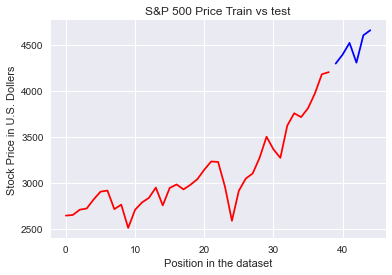

In [30]:
plt.title('S&P 500 Price Train vs test')
plt.xlabel('Position in the dataset')
plt.ylabel('Stock Price in U.S. Dollers')
plt.grid(True)
plt.plot(train, color = 'red')
plt.plot(test, color = 'blue')
plt.show()

In [31]:
#model = ARIMA(train, order=(6, 1, 1))
model = ARIMA(train, order=(6, 1, 1))
result = model.fit()

In [32]:
#model = ARIMA(train, order=(6, 1, 3))
#result = model.fit(disp=0)

step = 6

# Forecast
fc, se, conf = result.forecast(step)

print('fc')
print(fc)
print(len(fc))

fc
[4205.22311291 4228.92654776 4236.71473468 4259.91222802 4291.89965828
 4355.0242179 ]
6


In [33]:
fc = pd.Series(fc, index=test[:step].index)

lower = pd.Series(conf[:, 0], index=test[:step].index)
upper = pd.Series(conf[:, 1], index=test[:step].index)


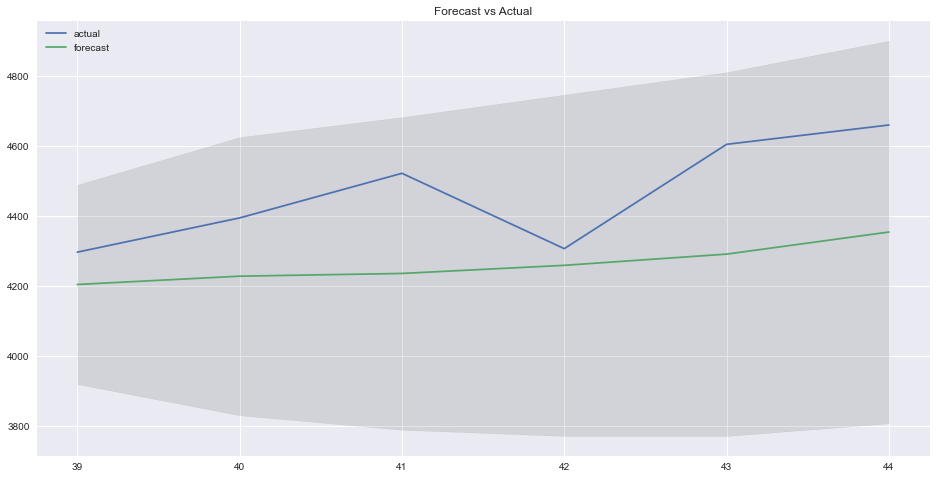

In [34]:
plt.figure(figsize=(16, 8))
plt.plot(test[:step], label="actual")
plt.plot(fc, label="forecast")
plt.fill_between(lower.index, lower, upper, color="k", alpha=0.1)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")

### Auto ARIMA

The pmdarima package provides an auto_arima method that uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

In [35]:
#from pmdarima.arima import auto_arima

from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

In [36]:
model = pm.auto_arima(
    Reverse_SP_500_Close_Values,
    start_p=1,
    start_q=1,
    m = 12,
      # frequency of series
    d=None,  # determine 'd'
    seasonal=False,  # no seasonality
    trace=True,
    stepwise=True,
)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=574.619, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=572.030, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=573.629, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=573.408, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=573.782, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.376 seconds


In [37]:
# Calculating rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(test, fc))

print(rmse)

227.98191758151347


In [38]:
#print(rms)

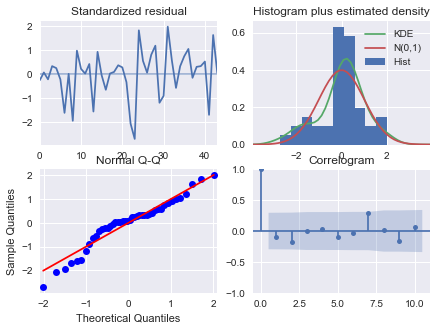

In [39]:
#import numpy as np

#rmse = np.mean(np.sqrt(fc - test[:step]))
#print(rmse)

from statsmodels.tsa.arima.model import ARIMAResults

model.plot_diagnostics(figsize=(7,5))
plt.show()

### Still need to evaluate the model !!!!

# SARIMA

In [41]:
data = pd.read_csv("SaP_500_3yrs_Monthly.csv", parse_dates=['Date'], index_col='Date')

data = data[['Close']].dropna()
data = data[::-1]

print(data)

              Close
Date               
2018-03-01  2640.87
2018-04-01  2648.05
2018-05-01  2705.27
2018-06-01  2718.37
2018-07-01  2816.29
2018-08-01  2901.52
2018-09-01  2913.98
2018-10-01  2711.74
2018-11-01  2760.17
2018-12-01  2506.85
2019-01-01  2704.10
2019-02-01  2784.49
2019-03-01  2834.40
2019-04-01  2945.83
2019-05-01  2752.06
2019-06-01  2941.76
2019-07-01  2980.38
2019-08-01  2926.46
2019-09-01  2976.74
2019-10-01  3037.56
2019-11-01  3140.98
2019-12-01  3230.78
2020-01-01  3225.52
2020-02-01  2954.22
2020-03-01  2584.59
2020-04-01  2912.43
2020-05-01  3044.31
2020-06-01  3100.29
2020-07-01  3271.12
2020-08-01  3500.31
2020-09-01  3363.00
2020-10-01  3269.96
2020-11-01  3621.63
2020-12-01  3756.07
2021-01-01  3714.24
2021-02-01  3811.15
2021-03-01  3972.89
2021-04-01  4181.17
2021-05-01  4204.11
2021-06-01  4297.50
2021-07-01  4395.26
2021-08-01  4522.68
2021-09-01  4307.54
2021-10-01  4605.38
2021-11-01  4660.57


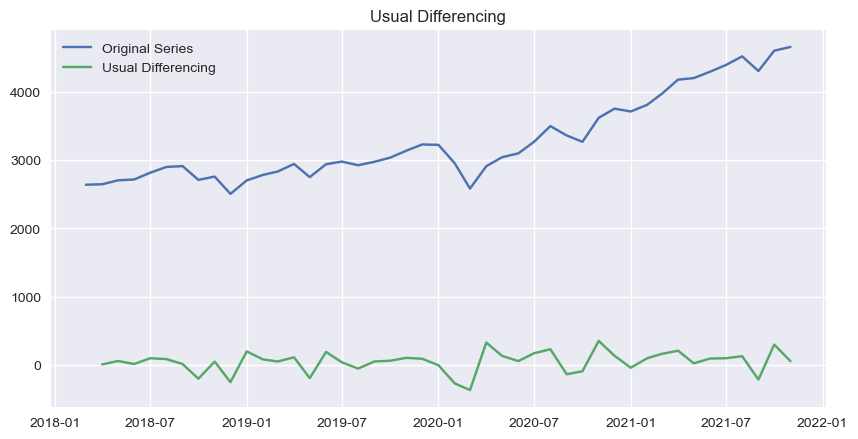

In [42]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100, sharex=True)

plt.plot(data, label='Original Series')
plt.plot(data.diff(1), label='Usual Differencing')
plt.title('Usual Differencing')
plt.legend(loc='upper left', fontsize=10)

plt.show()

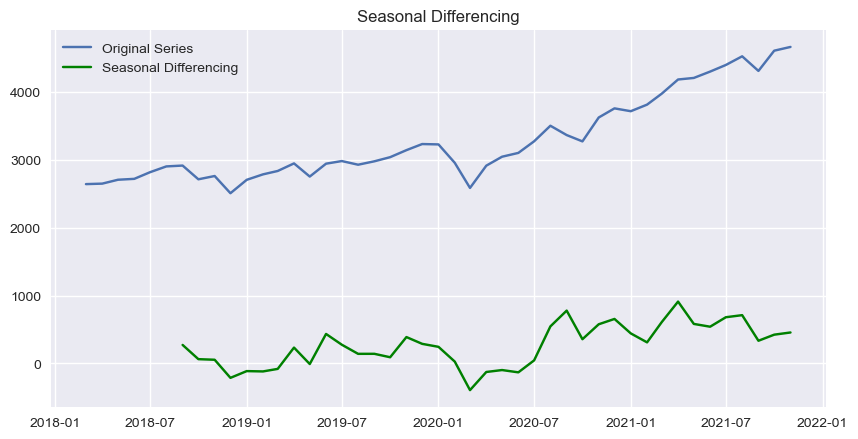

In [43]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100, sharex=True)

plt.plot(data, label='Original Series')
plt.plot(data.diff(6), label='Seasonal Differencing', color = 'green')
plt.title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)

plt.show()

In [44]:

# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data['Close'], start_p=1, start_q=1,
                         test='adf',
                         max_p=6, max_q=6, m=6,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,1)[6]             : AIC=inf, Time=0.15 sec
 ARIMA(0,2,0)(0,1,0)[6]             : AIC=541.383, Time=0.01 sec
 ARIMA(1,2,0)(1,1,0)[6]             : AIC=525.631, Time=0.04 sec
 ARIMA(0,2,1)(0,1,1)[6]             : AIC=inf, Time=0.08 sec
 ARIMA(1,2,0)(0,1,0)[6]             : AIC=534.313, Time=0.02 sec
 ARIMA(1,2,0)(2,1,0)[6]             : AIC=522.905, Time=0.08 sec
 ARIMA(1,2,0)(2,1,1)[6]             : AIC=521.582, Time=0.22 sec
 ARIMA(1,2,0)(1,1,1)[6]             : AIC=inf, Time=0.17 sec
 ARIMA(1,2,0)(2,1,2)[6]             : AIC=inf, Time=0.27 sec
 ARIMA(1,2,0)(1,1,2)[6]             : AIC=inf, Time=0.31 sec
 ARIMA(0,2,0)(2,1,1)[6]             : AIC=528.076, Time=0.12 sec
 ARIMA(2,2,0)(2,1,1)[6]             : AIC=517.548, Time=0.24 sec
 ARIMA(2,2,0)(1,1,1)[6]             : AIC=515.665, Time=0.18 sec
 ARIMA(2,2,0)(0,1,1)[6]             : AIC=513.666, Time=0.09 sec
 ARIMA(2,2,0)(0,1,0)[6]             : AIC=525.673, Time=0.04 sec
 A

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   45
Model:             SARIMAX(3, 2, 0)x(0, 1, [1], 6)   Log Likelihood                -250.942
Date:                             Fri, 12 Nov 2021   AIC                            511.883
Time:                                     19:38:22   BIC                            519.938
Sample:                                          0   HQIC                           514.723
                                              - 45                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7842      0.136     -5.754      0.000      -1.051      -0.517
ar.L2         -0.5947      0.156     -3.804      0.000      -0.901      -0.288
ar.L3         -0.3201      0.213     -1.503      0.133      -0.738       0.097
ma.S.L6       -0.8931      0.650     -1.375      0.169      -2.167       0.380
sigma2      3.437e+04   1.83e+04      1.874      0.061   -1577.770    7.03e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 0.41
Prob(Q):                              0.69   Prob(JB):                         0.81
Heteroskedasticity (H):               0.46   Skew:                            -0.01
Prob(H) (two-sided):                  0.19   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

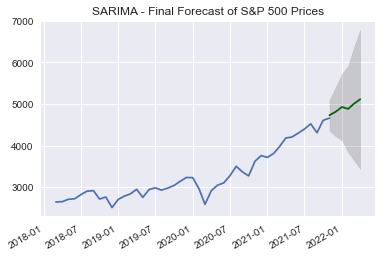

In [45]:

# Forecast
n_periods = 6
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15, label='conf int')

plt.title("SARIMA - Final Forecast of S&P 500 Prices")
plt.gcf().autofmt_xdate()
plt.show()

In [46]:
###  Print the results

In [47]:
## Printing out the output 

#history = [x for x in train]
#history = [x for x in train]
#predictions = list()
# walk-forward validation
#for t in range(len(test)):
#	model = ARIMA(history, order=(5,1,0))#
#	model_fit = model.fit()
#	output = model_fit.forecast()
#	yhat = output[0]
#	predictions.append(yhat)
#	obs = test[t]
#	history.append(obs)
#	print('predicted=%f, expected=%f' % (yhat, obs))
## evaluate forecasts
#rmse = sqrt(mean_squared_error(test, predictions))
#print('Test RMSE: %.3f' % rmse)

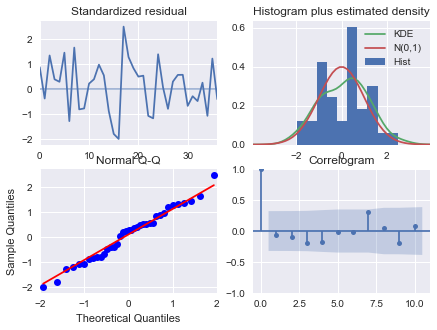

In [48]:
from statsmodels.tsa.arima.model import ARIMAResults

smodel.plot_diagnostics(figsize=(7,5))
plt.show()
